In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import tensorflow as tf
import keras

from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
#from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split 
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\wuchu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from tensorflow.python.keras.layers.embeddings import Embedding

In [3]:
from keras.losses import categorical_crossentropy

In [4]:
df = pd.read_csv('dataset/Text.csv')
df_d = df[df['label']==1]
df_nd = df[df['label']==0]

## 1. EDA

Text(0.5, 1.0, 'Distribution of Targe')

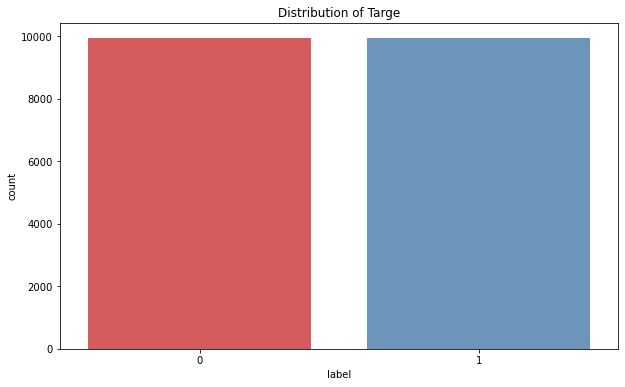

In [5]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Targe')

<ipython-input-6-08f8f6e17081>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the Word Count')

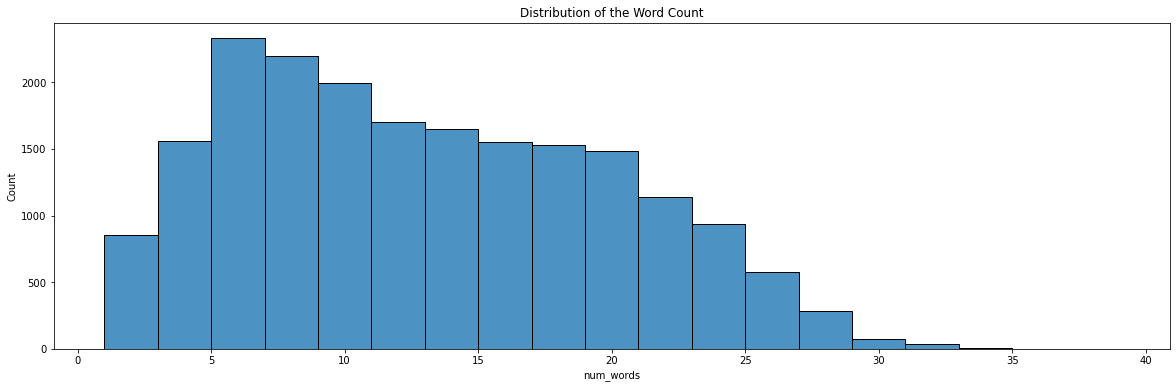

In [6]:
df['num_words'] = df['post_text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Word Count')

<ipython-input-7-cb421005f789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['num_words'] = df_d['post_text'].apply(lambda x: len(x.split()))
<ipython-input-7-cb421005f789>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the Word Count')

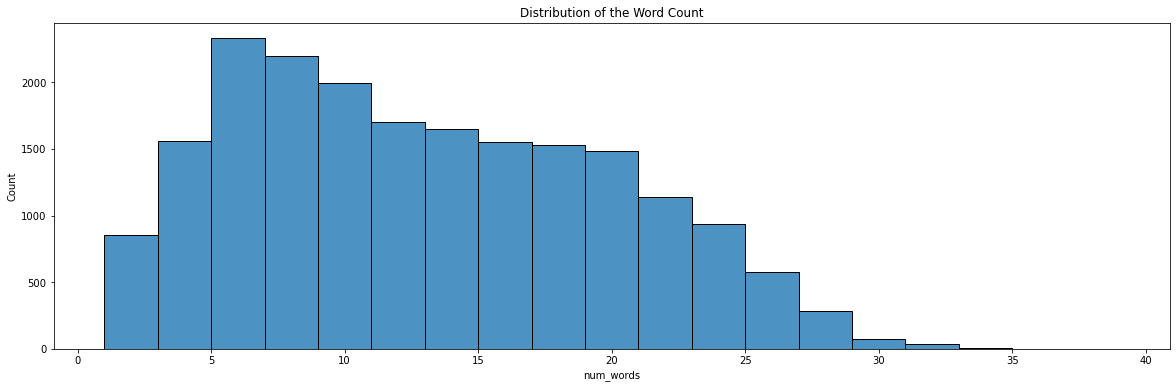

In [7]:
df_d['num_words'] = df_d['post_text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Word Count')

<ipython-input-8-b417d17bfc3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['num_words'] = df_nd['post_text'].apply(lambda x: len(x.split()))
<ipython-input-8-b417d17bfc3a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the Word Count')

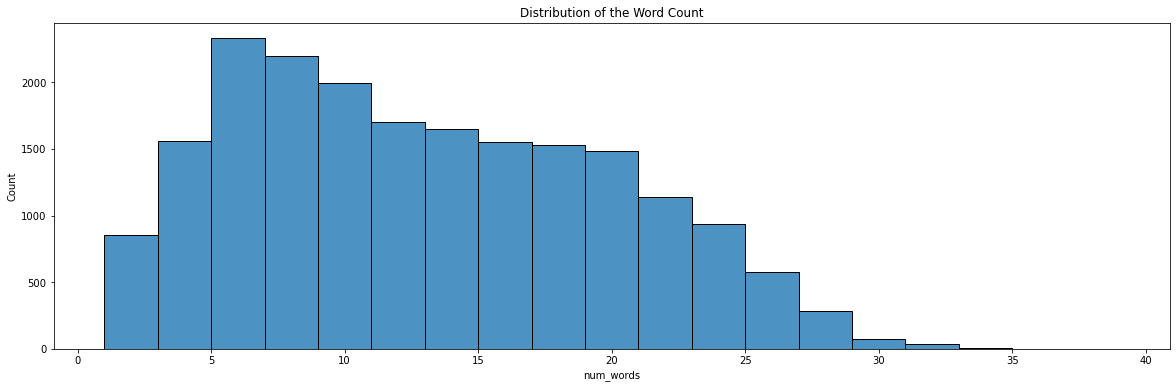

In [8]:
df_nd['num_words'] = df_nd['post_text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Word Count')

## 2. Data Preprocessing

In [9]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wuchu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wuchu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wuchu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wuchu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wuchu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642"
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"
          u"\u3030"
         "]+", flags=re.UNICODE)

In [11]:
def remove_emoji_and_mention(text):
    text = emoji_pattern.sub(r"", text)
    text = re.sub(r"([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    return text
  
def lower(text):
  #str form, should invoke before tokenise
    return text.lower()

def tokenise(text):
    return word_tokenize(text)

def lemmatise(text):
  #token array, should invoke after tokenise
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

def remove_stopword(text):
  #token array, should invoke after tokenise
    stopword = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopword]
    return text

def stemming(text):
  #token array, should invoke after tokenise
    ps = nltk.PorterStemmer()
    text = [ps.stem(word) for word in text]
    return text

def pos_tag(text):
    return nltk.pos_tag(text)

def preprocess(is_lower, is_remove_stopword, is_stem, is_lemma, is_pos_tag):
    df['text_clean'] = df['post_text'].apply(lambda x: remove_emoji_and_mention(x))
  
    if is_lower:
        df['text_clean'] = df['text_clean'].apply(lambda x: lower(x))
        df['text_clean'] = df['text_clean'].apply(lambda x: tokenise(x))
  
    if is_remove_stopword:
        df['text_clean'] = df['text_clean'].apply(lambda x: remove_stopword(x))
  
    if is_stem:
        df['text_clean'] = df['text_clean'].apply(lambda x: stemming(x))
    
    if is_lemma:
        df['text_clean'] = df['text_clean'].apply(lambda x: lemmatise(x))
  
    if is_pos_tag:
        df['text_clean_pos_tag'] = df['text_clean'].apply(lambda x : pos_tag(x))

In [13]:
preprocess_styles = [
    {
        'is_lower': True,
        'is_remove_stopword': True,
        'is_stem': True,
        'is_lemma': False,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_without_stopwords_stem_pos_tag.csv"
    },
    {
        'is_lower': True,
        'is_remove_stopword': True,
        'is_stem': False,
        'is_lemma': True,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_without_stopwords_lemma_pos_tag.csv"
    },
    {
        'is_lower': True,
        'is_remove_stopword': False,
        'is_stem': True,
        'is_lemma': False,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_with_stopwords_stem_pos_tag.csv"
    },
    {
        'is_lower': True,
        'is_remove_stopword': False,
        'is_stem': False,
        'is_lemma': True,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_with_stopwords_lemma_pos_tag.csv"
    },
    {
        'is_lower': True,
        'is_remove_stopword': False,
        'is_stem': False,
        'is_lemma': False,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_with_stopwords_pos_tag.csv"
    },
    {
        'is_lower': True,
        'is_remove_stopword': True,
        'is_stem': False,
        'is_lemma': False,
        'is_pos_tag': True,
        'csv_name': "preprocessed_lower_without_stopwords_pos_tag.csv"
    },
    {
        'is_lower': False,
        'is_remove_stopword': True,
        'is_stem': False,
        'is_lemma': False,
        'is_pos_tag': True,
        'csv_name': "preprocessed_without_lower_without_stopwords_pos_tag.csv"
    }
]

In [14]:
for style in preprocess_styles:
    preprocess(style['is_lower'], style['is_remove_stopword'], style['is_stem'], style['is_lemma'], style['is_pos_tag'])
    df.to_csv(style["csv_name"], index=False)

In [15]:
df1 = pd.read_csv('preprocessed_lower_without_stopwords_stem_pos_tag.csv')

In [16]:
df2 = pd.read_csv('preprocessed_lower_without_stopwords_lemma_pos_tag.csv')

In [17]:
df3 = pd.read_csv('preprocessed_lower_with_stopwords_stem_pos_tag.csv')

In [18]:
df4 = pd.read_csv('preprocessed_lower_with_stopwords_lemma_pos_tag.csv')

In [19]:
df5 = pd.read_csv('preprocessed_lower_with_stopwords_pos_tag.csv')

In [20]:
df6 = pd.read_csv('preprocessed_lower_without_stopwords_pos_tag.csv')

In [21]:
df7 = pd.read_csv('preprocessed_without_lower_without_stopwords_pos_tag.csv')

## 3. Train Test Split

In [38]:
#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['post_text'], df['label'], test_size=0.2, random_state = 123)

### 3.1 Tokenization

In [39]:
#define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

#return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 30204


### 3.2 Pad sequences to fixed lenght

In [40]:
#maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 40

#padded sequences
X_train_seq = sequence.pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_LEN)

## 4. Train and evaluate the Keras LSTM model

### 4.1 Define the model

In [41]:
#define the model
model = tf.keras.Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index)+1, 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#model.compile(optimizer=keras.optimizers.Adam(0.001),
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])
#model.summary()


#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_2 (ModuleWra  (None, 40, 128)          3866240   
 pper)                                                           
                                                                 
 bidirectional_4 (Bidirectio  (None, 40, 256)          263168    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

### 4.2 Training the model

In [42]:
history = model.fit(X_train_seq, y_train, epochs=10,validation_split = 0.2, batch_size = 32, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/10
398/398 [==============================] - 41s 90ms/step - loss: 0.4037 - accuracy: 0.7969 - val_loss: 0.2690 - val_accuracy: 0.8821
Epoch 2/10
398/398 [==============================] - 34s 87ms/step - loss: 0.1167 - accuracy: 0.9536 - val_loss: 0.2760 - val_accuracy: 0.8777
Epoch 3/10
398/398 [==============================] - 35s 88ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.4116 - val_accuracy: 0.8862
Epoch 4/10
398/398 [==============================] - 34s 86ms/step - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.4787 - val_accuracy: 0.8790
Epoch 5/10
398/398 [==============================] - 34s 87ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.6551 - val_accuracy: 0.8799
Epoch 6/10
398/398 [==============================] - 36s 91ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5744 - val_accuracy: 0.8919
Epoch 7/10
398/398 [==============================] - 37s 92ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.6269 - val_accuracy:

### 4.3 Evaluate the model

In [43]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

125/125 [==============================] - 3s 18ms/step
Test Loss: 0.5872743725776672
Test Accuracy: 0.885340690612793


In [44]:
## print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2024
           1       0.88      0.88      0.88      1953

    accuracy                           0.89      3977
   macro avg       0.89      0.89      0.89      3977
weighted avg       0.89      0.89      0.89      3977



Text(51.0, 0.5, 'Real Labels')

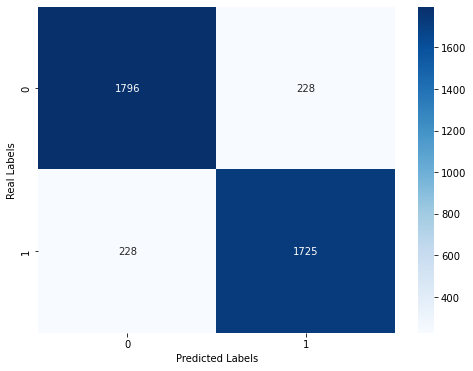

In [45]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, np.where(y_hat >= 0.5, 1, 0)), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

The model provides good results with accuracy around 86.62%

Specific text cleaning can increase the accuracy of the model

To use more efficiently the data we can use StratifiedKFold and run 5 or 10 folds of training/validation

Try different LSTM unit size/layer number